# **Workshop 5**

Diego Isaac Fuentes Juvera A01705506

In [ ]:
import requests
import pandas as pd
# Code to download the IGAE index from the INEGI site:
token = 'c4559227-83d3-aeb4-1a8d-bee73f627140'

igae_id = '737121'

url =  f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/{igae_id}/es/0700/false/BIE/2.0/{token}?type=json'

response = requests.get(url)
data = response.json()
series = data.get('Series', [])
observations = series[0].get('OBSERVATIONS', [])
igaedf = pd.DataFrame(observations)
# Convert the month to a date type variable:
igaedf['TIME_PERIOD'] = pd.to_datetime(igaedf['TIME_PERIOD'], format='%Y/%m')
# Convert the IGAE index to a numeric variable:
igaedf['OBS_VALUE'] = pd.to_numeric(igaedf['OBS_VALUE'], errors='coerce')
# Keep only the columns we need
igaedf = igaedf[['TIME_PERIOD', 'OBS_VALUE']]
# Rename the columns:
igaedf.columns = ['Month', 'IGAE']
# Setting the month as the index of the series:
igaedf = igaedf.set_index('Month')
# Sorting the data according to the index:
igaedf = igaedf.sort_index()
# Display the first few rows
print(igaedf.head())

                 IGAE
Month                
1993-01-01  55.434736
1993-02-01  56.456971
1993-03-01  58.900549
1993-04-01  57.135844
1993-05-01  57.891853


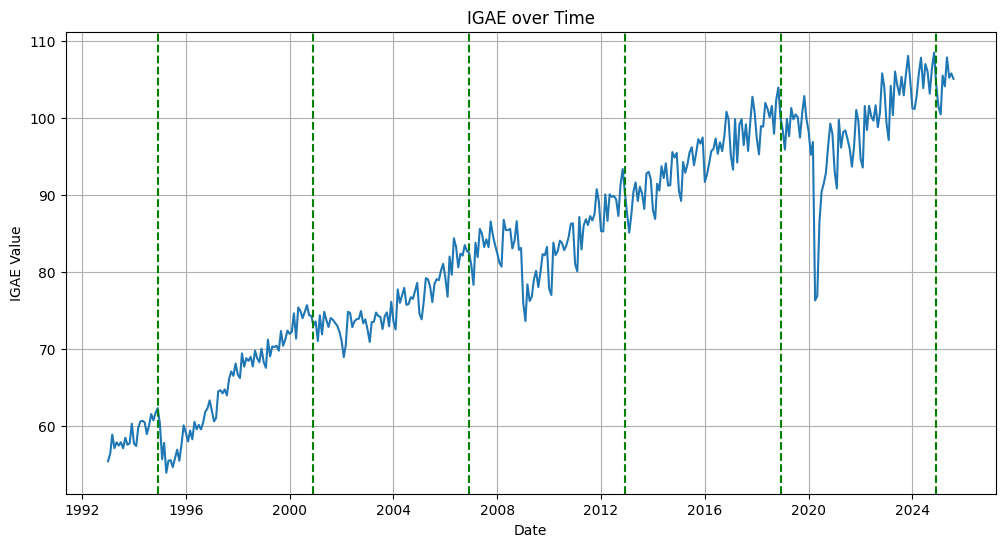

In [ ]:
# prompt: plot the IGAE from df, and trace a vertical line in Dec 2018 and Dec 2024

import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(igaedf.index, igaedf['IGAE'])
plt.title('IGAE over Time')
plt.xlabel('Date')
plt.ylabel('IGAE Value')
plt.grid(True)

# Trace vertical lines to identify the 6-year government periods
plt.axvline(pd.to_datetime('1994-12-01'), color='green', linestyle='--')
plt.axvline(pd.to_datetime('2000-12-01'), color='green',linestyle='--')
plt.axvline(pd.to_datetime('2006-12-01'), color='green',linestyle='--')
plt.axvline(pd.to_datetime('2012-12-01'), color='green',linestyle='--')
plt.axvline(pd.to_datetime('2018-12-01'), color='green',linestyle='--')
plt.axvline(pd.to_datetime('2024-12-01'), color='green',linestyle='--')

plt.show()

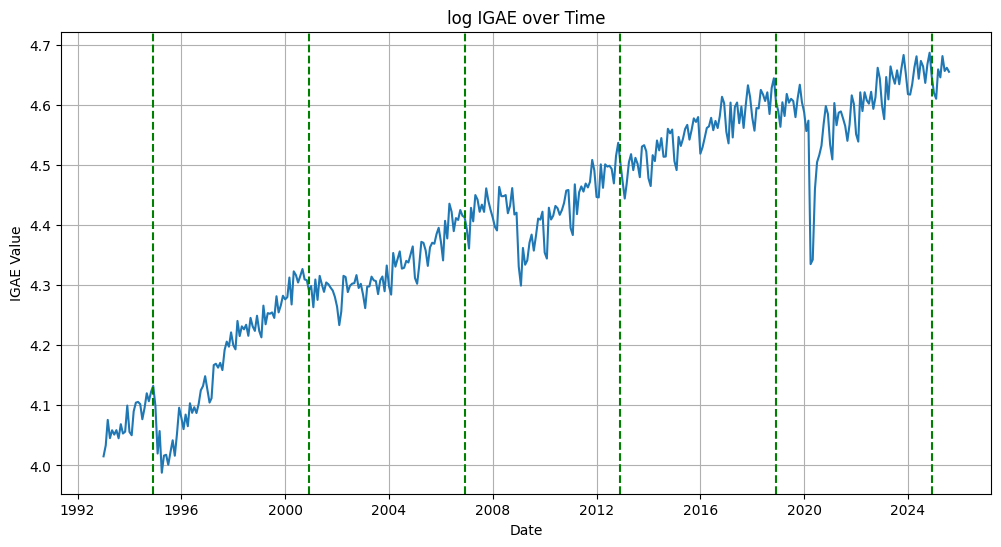

In [ ]:
import numpy as np
igaedf['logIGAE'] = np.log(igaedf['IGAE'])

plt.figure(figsize=(12, 6))
plt.plot(igaedf.index, igaedf['logIGAE'])
plt.title('log IGAE over Time')
plt.xlabel('Date')
plt.ylabel('IGAE Value')
plt.grid(True)
plt.axvline(pd.to_datetime('1994-12-01'), color='green', linestyle='--')
plt.axvline(pd.to_datetime('2000-12-01'), color='green',linestyle='--')
plt.axvline(pd.to_datetime('2006-12-01'), color='green',linestyle='--')
plt.axvline(pd.to_datetime('2012-12-01'), color='green',linestyle='--')
plt.axvline(pd.to_datetime('2018-12-01'), color='green',linestyle='--')
plt.axvline(pd.to_datetime('2024-12-01'), color='green',linestyle='--')

plt.show()



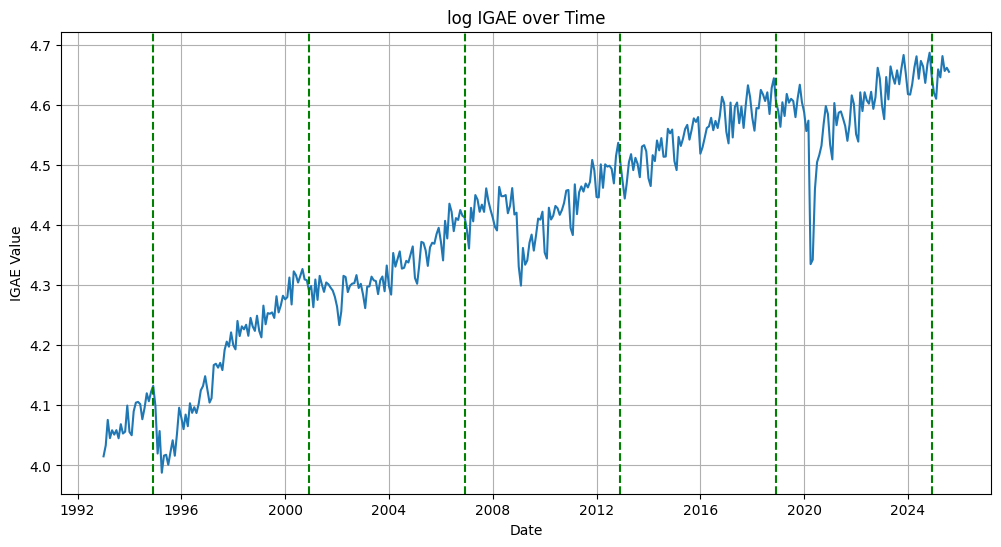

In [ ]:
import numpy as np
igaedf['logIGAE'] = np.log(igaedf['IGAE'])

plt.figure(figsize=(12, 6))
plt.plot(igaedf.index, igaedf['logIGAE'])
plt.title('log IGAE over Time')
plt.xlabel('Date')
plt.ylabel('IGAE Value')
plt.grid(True)
plt.axvline(pd.to_datetime('1994-12-01'), color='green', linestyle='--')
plt.axvline(pd.to_datetime('2000-12-01'), color='green',linestyle='--')
plt.axvline(pd.to_datetime('2006-12-01'), color='green',linestyle='--')
plt.axvline(pd.to_datetime('2012-12-01'), color='green',linestyle='--')
plt.axvline(pd.to_datetime('2018-12-01'), color='green',linestyle='--')
plt.axvline(pd.to_datetime('2024-12-01'), color='green',linestyle='--')

plt.show()

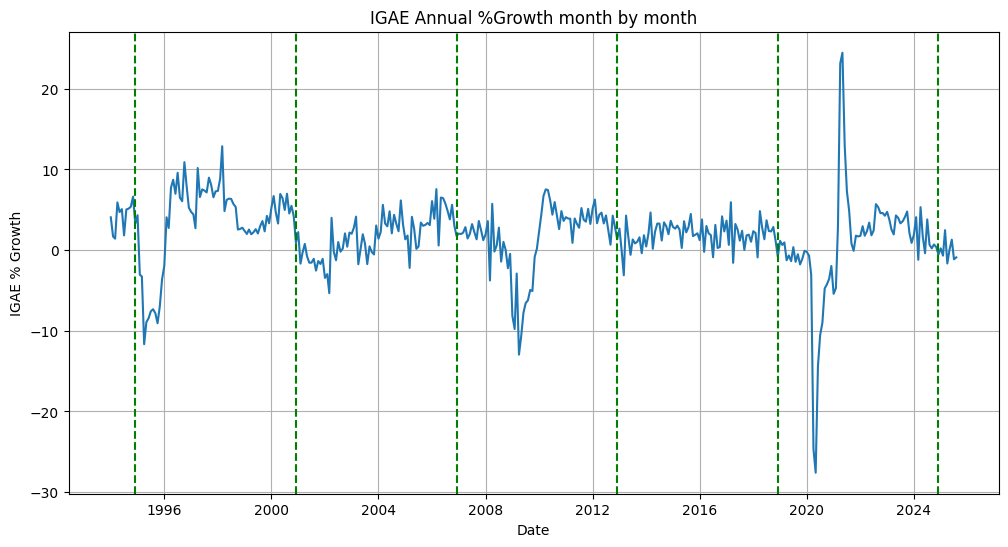

In [ ]:
igaedf['annualgrowth'] = igaedf['logIGAE'] - igaedf['logIGAE'].shift(12)
# We can also do this annual growth by using the diff function:
# igaedf['annualgrowth2'] = igaedf['logIGAE'].diff(12)

plt.figure(figsize=(12, 6))
plt.plot(igaedf.index, 100*igaedf['annualgrowth'])
plt.title('IGAE Annual %Growth month by month')
plt.xlabel('Date')
plt.ylabel('IGAE % Growth')
plt.grid(True)
plt.axvline(pd.to_datetime('1994-12-01'), color='green', linestyle='--')
plt.axvline(pd.to_datetime('2000-12-01'), color='green',linestyle='--')
plt.axvline(pd.to_datetime('2006-12-01'), color='green',linestyle='--')
plt.axvline(pd.to_datetime('2012-12-01'), color='green',linestyle='--')
plt.axvline(pd.to_datetime('2018-12-01'), color='green',linestyle='--')
plt.axvline(pd.to_datetime('2024-12-01'), color='green',linestyle='--')

plt.show()

In [ ]:
# !pip install statsmodels
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(igaedf['annualgrowth'].dropna())

# Print the results
print('ADF Statistic: %f' % dftest[0])

print('p-value: %f' % dftest[1])

print('Critical Values:')

for key, value in dftest[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.962962
p-value: 0.001617
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


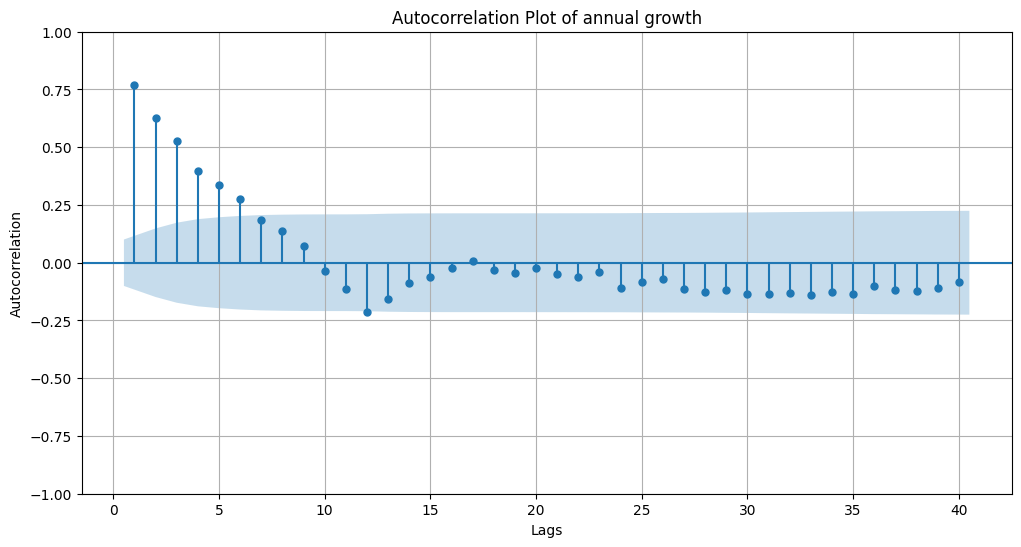

In [ ]:
# prompt: Using igaedf, Do an autocorrelation plot and a partial autocorrelation plot of 'annualgrowth'

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Drop NaN values created by the differencing
annual_growth = igaedf.dropna(subset=['annualgrowth'])

# Autocorrelation plot
plt.figure(figsize=(12, 6))
plot_acf(annual_growth['annualgrowth'], lags=40, zero=False, ax=plt.gca())
plt.title('Autocorrelation Plot of annual growth')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

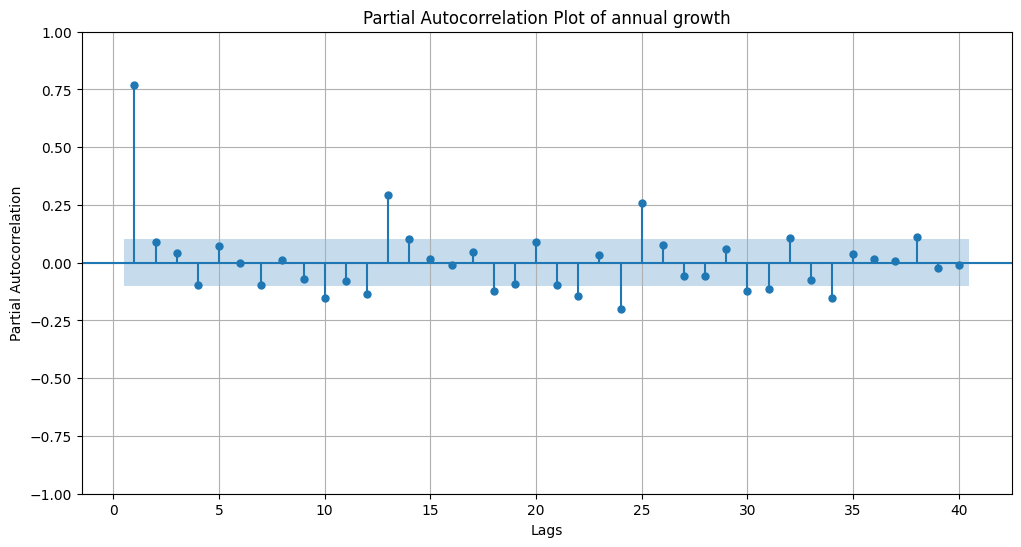

In [ ]:
# Partial autocorrelation plot
plt.figure(figsize=(12, 6))
plot_pacf(annual_growth['annualgrowth'], zero=False, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Plot of annual growth')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

igae_log = igaedf['logIGAE'].dropna()

# Fit SARIMA model ARIMA(p=1,d=0,q=0) SARIMA(P=0,D=1,Q=0,#periods=12)
model = SARIMAX(igae_log, order=(1, 0, 0),
                seasonal_order=(0, 1, 0, 12),
                trend='c') # Include drift/constant term
result = model.fit()
print(result.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            logIGAE   No. Observations:                  392
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                 801.153
Date:                            Thu, 13 Nov 2025   AIC                          -1596.306
Time:                                    00:32:08   BIC                          -1584.486
Sample:                                01-01-1993   HQIC                         -1591.616
                                     - 08-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0043      0.002      2.859      0.004       0.001       0.007
ar.L1          0.7694      0.021   

In [ ]:
phi0 = result.params['intercept']
phi1= result.params['ar.L1']

print('phi0 = intercept = %f' % phi0)

phi0 = intercept = 0.004334


In [ ]:
print('phi1 = %f' % phi1)

phi1 = 0.769374


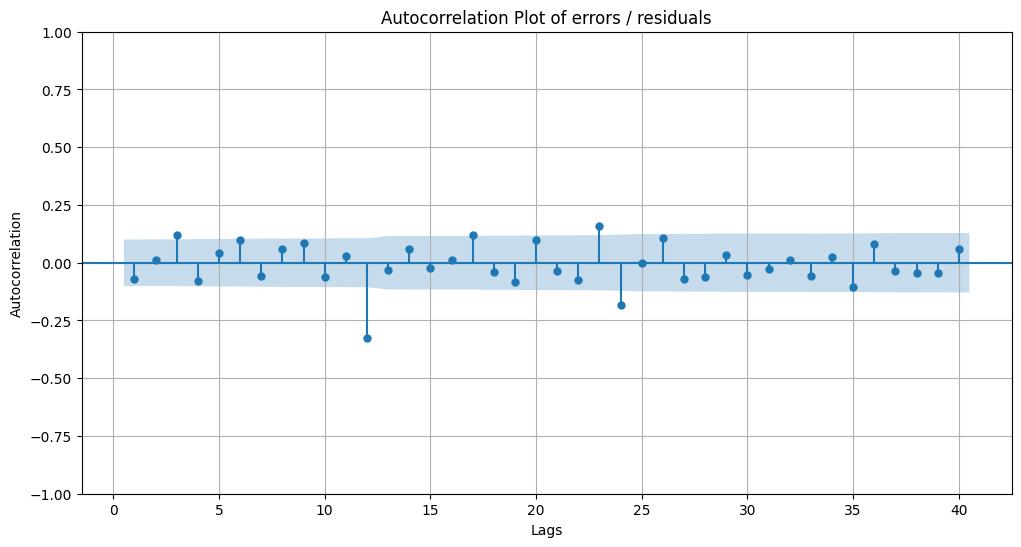

In [ ]:
# Autocorrelation plot
plt.figure(figsize=(12, 6))
plot_acf(result.resid.iloc[12:], lags=40, zero=False, ax=plt.gca())
plt.title('Autocorrelation Plot of errors / residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

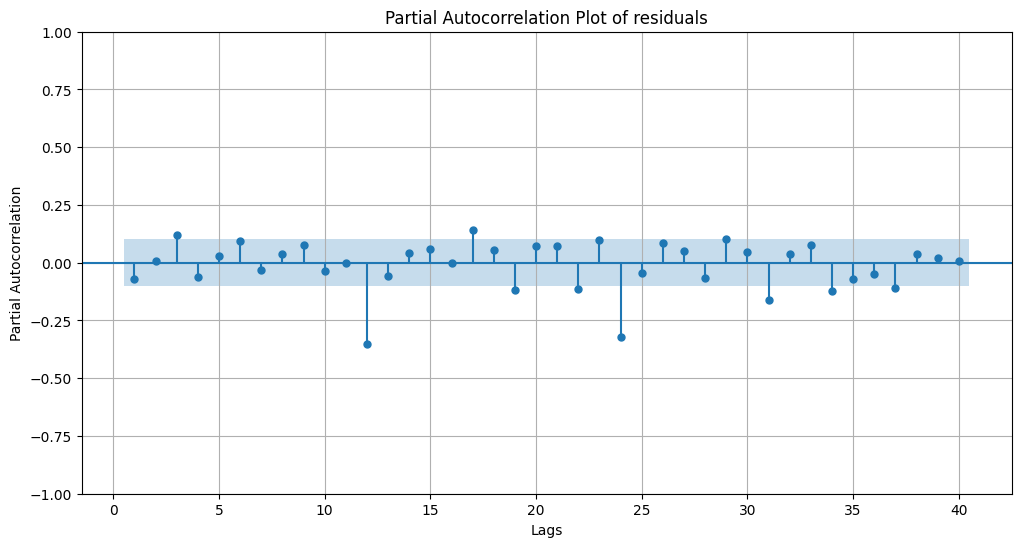

In [ ]:
# Partial autocorrelation plot
plt.figure(figsize=(12, 6))
plot_pacf(result.resid.iloc[12:], zero=False, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Plot of residuals')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

In [ ]:
igae_log = igaedf['logIGAE'].dropna()

# Fit SARIMA model ARIMA(p=1,d=0,q=0) SARIMA(P=0,D=1,Q=1,#periods=12)
model = SARIMAX(igae_log, order=(1, 0, 0),
                seasonal_order=(0, 1, 1, 12),
                trend='c') # Include drift/constant term
result = model.fit()
print(result.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                              logIGAE   No. Observations:                  392
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 864.452
Date:                              Thu, 13 Nov 2025   AIC                          -1720.904
Time:                                      00:44:37   BIC                          -1705.144
Sample:                                  01-01-1993   HQIC                         -1714.650
                                       - 08-01-2025                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0026      0.000      6.752      0.000       0.002       0.003
ar.L1          0.86

In [ ]:
phi0 = result.params['intercept']
phi1= result.params['ar.L1']
theta1 = result.params['ma.S.L12']

print('phi0 = intercept = %f' % phi0)

print('phi1 = %f' % phi1)

print('theta1 = %f' % theta1)

phi0 = intercept = 0.002591
phi1 = 0.861471
theta1 = -0.817436


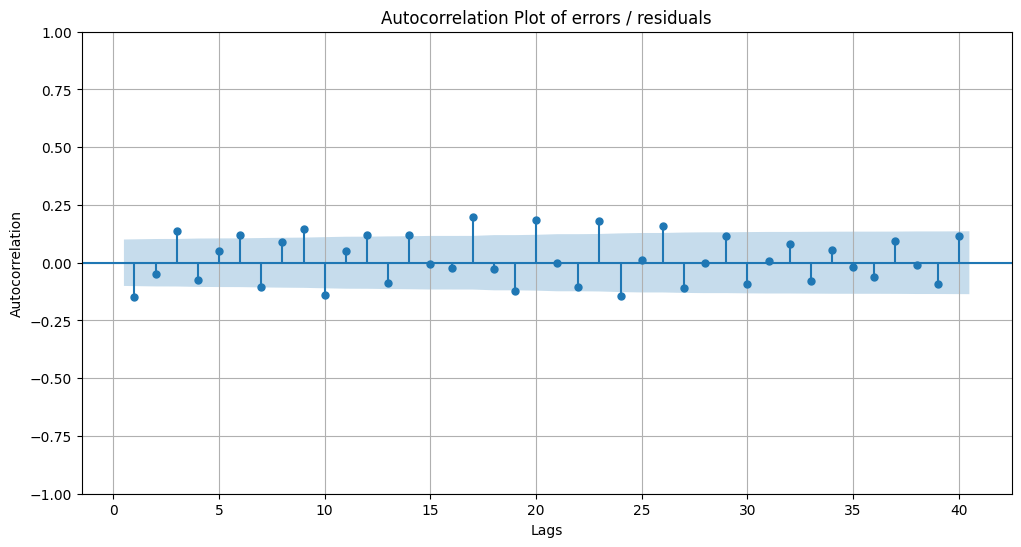

In [ ]:
# Autocorrelation plot
plt.figure(figsize=(12, 6))
plot_acf(result.resid.iloc[12:], lags=40, zero=False, ax=plt.gca())
plt.title('Autocorrelation Plot of errors / residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

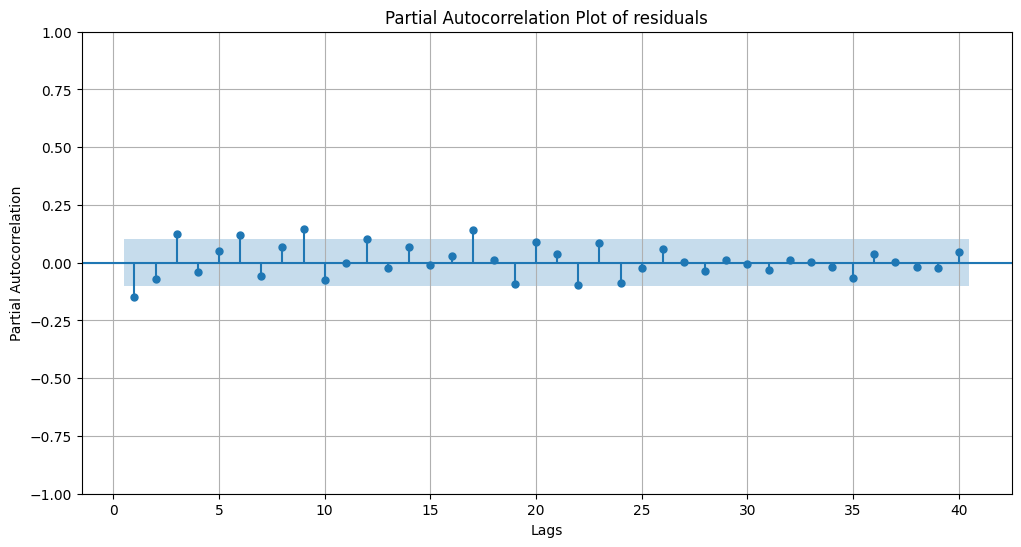

In [ ]:
# Partial autocorrelation plot
plt.figure(figsize=(12, 6))
plot_pacf(result.resid.iloc[12:], zero=False, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Plot of residuals')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

In [ ]:
# Fit SARIMA model ARIMA(p=1,d=0,q=1) SARIMA(P=0,D=1,Q=1,#periods=12)
model = SARIMAX(igae_log, order=(1, 0, 1),
                seasonal_order=(0, 1, 1, 12),
                trend='c') # Include drift/constant term
result = model.fit()
print(result.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            logIGAE   No. Observations:                  392
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                 864.619
Date:                            Thu, 13 Nov 2025   AIC                          -1719.239
Time:                                    00:45:19   BIC                          -1699.538
Sample:                                01-01-1993   HQIC                         -1711.421
                                     - 08-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0033      0.001      4.632      0.000       0.002       0.005
ar.L1          0.8225      0.034   

In [ ]:
phi0 = result.params['intercept']
phi1= result.params['ar.L1']
theta1 = result.params['ma.L1']
theta2 = result.params['ma.S.L12']

print('phi0 = intercept = %f' % phi0)
print('phi1 = %f' % phi1)
print('theta1 = %f' % theta1)
print('theta2 = %f' % theta2)

phi0 = intercept = 0.003325
phi1 = 0.822456
theta1 = -0.158917
theta2 = -0.786725


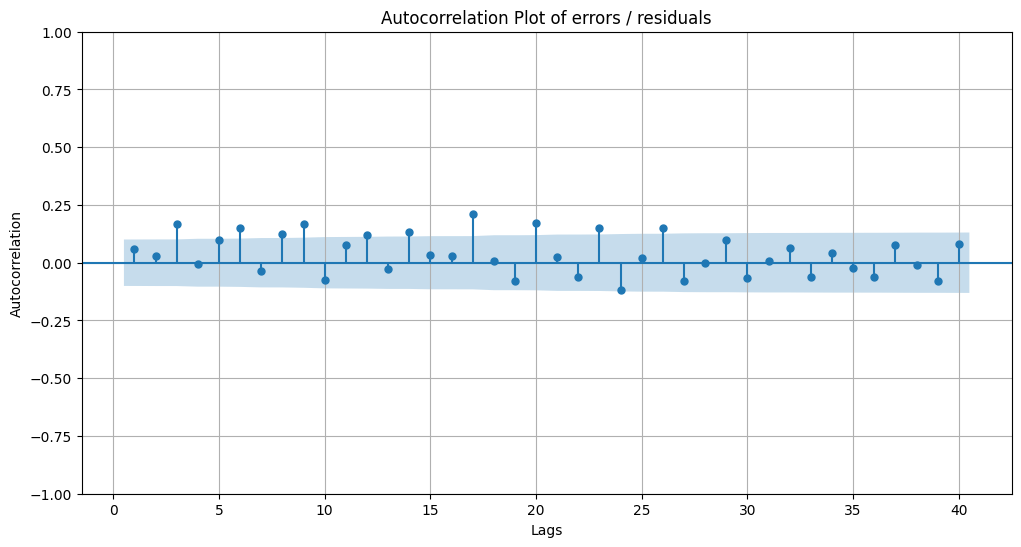

In [ ]:
# Autocorrelation plot
plt.figure(figsize=(12, 6))
plot_acf(result.resid.iloc[12:], lags=40, zero=False, ax=plt.gca())
plt.title('Autocorrelation Plot of errors / residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

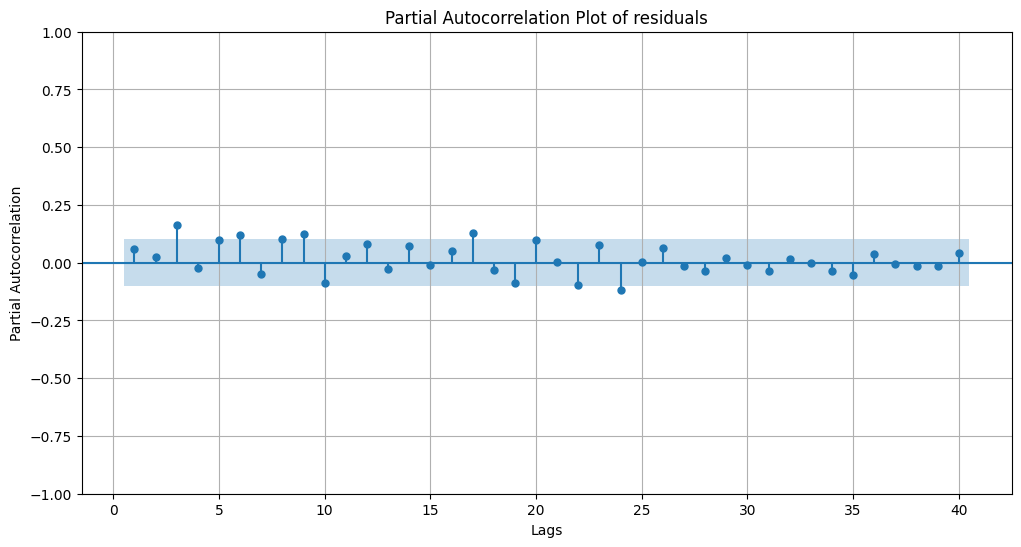

In [ ]:
# Partial autocorrelation plot
plt.figure(figsize=(12, 6))
plot_pacf(result.resid.iloc[12:], zero=False, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Plot of residuals')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

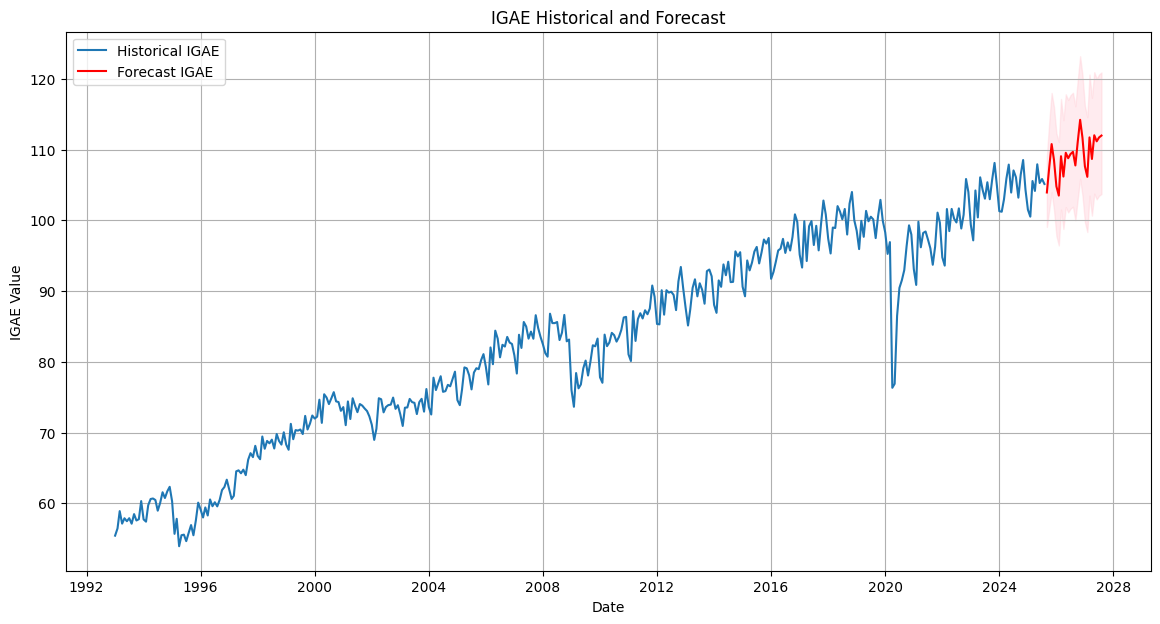

In [ ]:
# I will forecast 24 months in the future:
forecast_steps = 24
forecast_result = result.get_forecast(steps=forecast_steps)
# I get the mean forecast:
forecast_log = forecast_result.predicted_mean
# Get the 95% confidence interval of the forecast:
# alpha = 1 - confidence interval
forecast_ci = forecast_result.conf_int(alpha=0.05)

# Convert log forecast values back to original scale of IGAE
forecast_values = np.exp(forecast_log)

# Plot historical and forecast values
plt.figure(figsize=(14, 7))
plt.plot(igaedf.index, igaedf['IGAE'], label='Historical IGAE')
plt.plot(forecast_values.index, forecast_values, label='Forecast IGAE', color='red')
plt.fill_between(forecast_values.index, np.exp(forecast_ci.iloc[:, 0]), np.exp(forecast_ci.iloc[:, 1]), color='pink', alpha=0.3) # Plot confidence interval

plt.title('IGAE Historical and Forecast')
plt.xlabel('Date')
plt.ylabel('IGAE Value')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Fit SARIMA model ARIMA(p=1,d=0,q=1) SARIMA(P=0,D=1,Q=1,#periods=12)
model = SARIMAX(igae_log, order=(1, 0, 1),
                seasonal_order=(0, 1, 1, 12),
                trend='c') # Include drift/constant term
result = model.fit()
print(result.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            logIGAE   No. Observations:                  392
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                 864.619
Date:                            Thu, 13 Nov 2025   AIC                          -1719.239
Time:                                    00:46:04   BIC                          -1699.538
Sample:                                01-01-1993   HQIC                         -1711.421
                                     - 08-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0033      0.001      4.632      0.000       0.002       0.005
ar.L1          0.8225      0.034   

# Challenge 1

In [ ]:
# prompt: Download the series NGDPRNSAXDCMXQ from the FRED site since 1993, and using pandas_reader
# Install the pandas_datareader:
#!pip install pandas_datareader

import pandas_datareader as pdr
# This part is already done in the preceding code.
series_id = "NGDPRNSAXDCMXQ"
mxgdpdf = pdr.get_data_fred(series_id,start='1993-01-01')
mxgdpdf.columns=['MXGDP']
print(mxgdpdf.head())

                MXGDP
DATE                 
1993-01-01  3439763.5
1993-04-01  3472286.3
1993-07-01  3465719.7
1993-10-01  3519338.2
1994-01-01  3525020.1


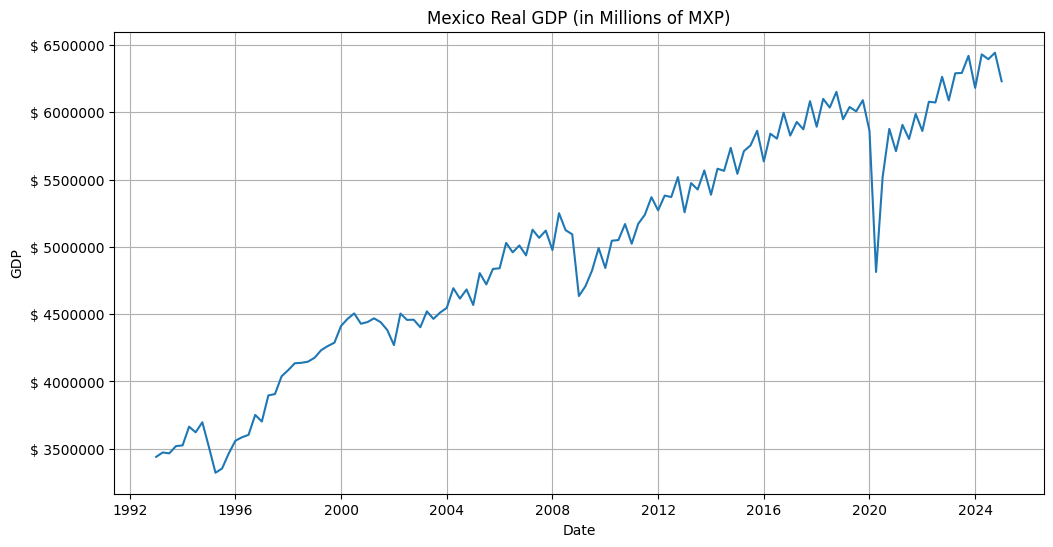

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.figure(figsize=(12, 6))
plt.plot(mxgdpdf.index, mxgdpdf['MXGDP'])
plt.title('Mexico Real GDP (in Millions of MXP)')
plt.xlabel('Date')
plt.ylabel('GDP')
# Format the y-axis to show in currency format
formatter = mticker.FormatStrFormatter('$ %1.0f')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(True)
plt.show()


## Calibration Steps and Model Interpretation:

I started with the logarithmically transformed Mexico GDP series to stabilize variance, which was created in an earlier step.

Based on previous analysis (Augmented Dickey-Fuller test, ACF and PACF plots of differenced data), I determined suitable orders for the SARIMA model. The series was be non stationary so it requires seasonal differencing D=1 with a seasonal period of 4 (quarterly data). The non seasonal components were identified as p=1 and q=0, and seasonal components as P=0 and Q=1. So the fianl model is a SARIMA(1,0,0)x(0,1,1,4) model.


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prepare the log-transformed GDP data
gdp_log = mxgdpdf['logMXGDP'].dropna()

# Fit the SARIMA model with previously determined orders
model = SARIMAX(gdp_log, order=(1, 0, 0),
                seasonal_order=(0, 1, 1, 4),
                trend='c')

result = model.fit(maxiter=1000)

# Print the model summary
print(result.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                            logMXGDP   No. Observations:                  129
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 4)   Log Likelihood                 262.560
Date:                             Thu, 13 Nov 2025   AIC                           -517.120
Time:                                     00:54:10   BIC                           -505.807
Sample:                                 01-01-1993   HQIC                          -512.524
                                      - 01-01-2025                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0039      0.001      5.041      0.000       0.002       0.005
ar.L1          0.7935      



This cell generates forecasts for the remaining quarters of 2025 and all quarters of 2026, and then plot the historical data alongside the forecast and its 95% confidence interval.

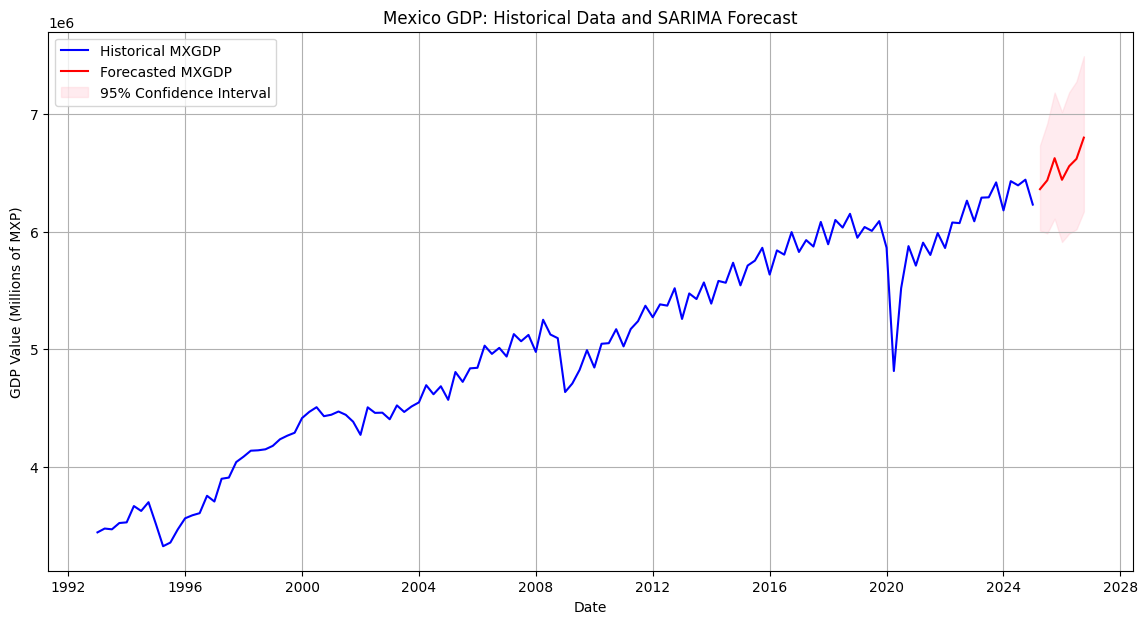

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Determine the number of forecast steps:
# The last data point in `gdp_log` is '2025-01-01' (Q1 2025).
# Remaining quarters of 2025: Q2, Q3, Q4 (3 quarters)
# All quarters of 2026: Q1, Q2, Q3, Q4 (4 quarters)
# Total forecast steps = 3 + 4 = 7 quarters.
forecast_steps_gdp = 7

# Generate the forecast
forecast_result_gdp = result.get_forecast(steps=forecast_steps_gdp)

# Get the mean forecast (log-transformed)
forecast_log_gdp = forecast_result_gdp.predicted_mean

# Get the 95% confidence interval of the forecast (log-transformed)
forecast_ci_gdp = forecast_result_gdp.conf_int(alpha=0.05)

# Convert log forecast values back to original scale of GDP
forecast_values_gdp = np.exp(forecast_log_gdp)

# Convert log confidence interval values back to original scale of GDP
forecast_ci_gdp_original_scale = np.exp(forecast_ci_gdp)

# Plot historical and forecast values
plt.figure(figsize=(14, 7))
plt.plot(mxgdpdf.index, mxgdpdf['MXGDP'], label='Historical MXGDP', color='blue')
plt.plot(forecast_values_gdp.index, forecast_values_gdp, label='Forecasted MXGDP', color='red')
plt.fill_between(forecast_values_gdp.index,
                 forecast_ci_gdp_original_scale.iloc[:, 0],
                 forecast_ci_gdp_original_scale.iloc[:, 1],
                 color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('Mexico GDP: Historical Data and SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('GDP Value (Millions of MXP)')
plt.legend()
plt.grid(True)
plt.show()

## Interpretation

Coefficients: The intercept, ar.L1 (non-seasonal autoregressive of order 1), and ma.S.L4 (seasonal moving average of order 1 at lag 4) are all statistically significant (p-values < 0.05), indicating their importance in explaining the GDP variations.

AIC/BIC: These  criteria help compare models, with lower values indicating a better fit, in this case the model has an AIC of -517.120.

Jung-Box Test (Q): The p-value (0.27) is greater than 0.05, suggesting that the residuals of the model are white noise (no significant autocorrelation left), which is a good sign for model fit.

Jarque-Bera Test (JB): The p-value (0.00) indicates that the residuals are not normally distributed

Heteroskedasticity (H): The p-value (0.00) indicates the presence of heteroskedasticity, meaning the variance of the residuals is not constant. This also points to potential volatility.

### Simplified SARIMA Model for Mexico GDP and Forecast

This section demonstrates a concise approach to building and forecasting with a SARIMA model for Mexico's GDP. We will use the log-transformed GDP data logMXGDP and apply the SARIMA(1,0,0)x(0,1,1,4) model, which was previously determined to be a suitable fit. The model will forecast GDP for the remainder of 2025 and all of 2026.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


SARIMA Model Summary:
                                      SARIMAX Results                                      
Dep. Variable:                            logMXGDP   No. Observations:                  129
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 4)   Log Likelihood                 262.560
Date:                             Thu, 13 Nov 2025   AIC                           -517.120
Time:                                     01:19:52   BIC                           -505.807
Sample:                                 01-01-1993   HQIC                          -512.524
                                      - 01-01-2025                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0039      0.001      5.041      0.000       0.002       0.005
ar.L1

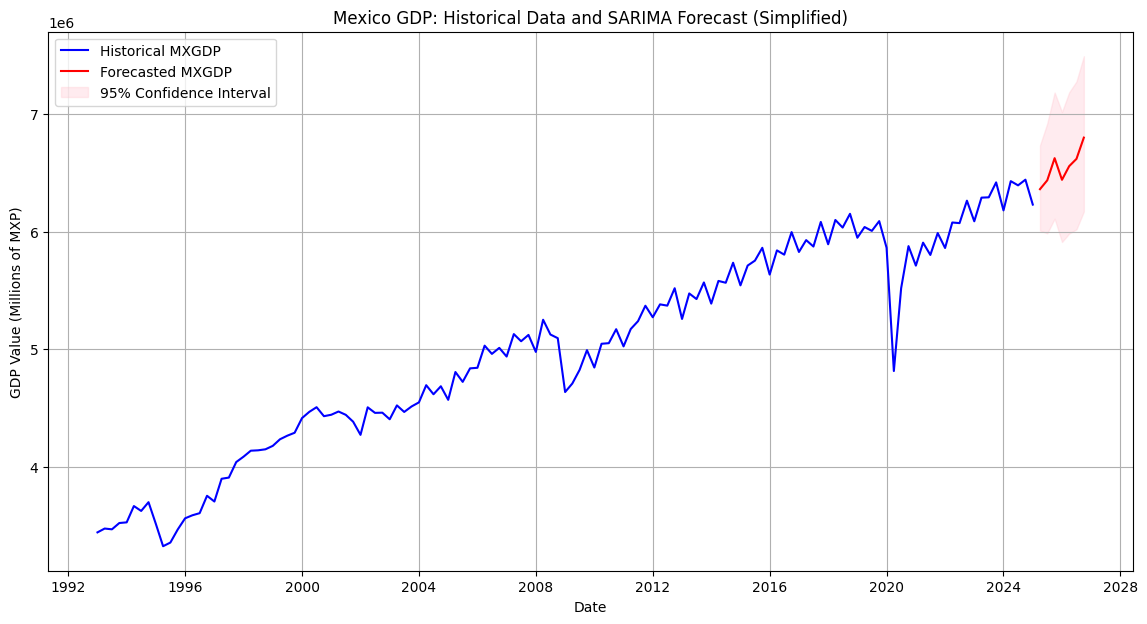

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prepare the log-transformed GDP data (assuming mxgdpdf and logMXGDP are available)
gdp_log = mxgdpdf['logMXGDP'].dropna()

# Define the number of forecast steps (remaining quarters of 2025 and all of 2026)
# Last data point is Q1 2025, so 3 quarters for 2025 (Q2, Q3, Q4) + 4 quarters for 2026
forecast_steps_gdp = 7

# Fit the SARIMA model with the previously determined orders
model = SARIMAX(gdp_log, order=(1, 0, 0),
                seasonal_order=(0, 1, 1, 4),
                trend='c') # Include constant/drift term
result = model.fit(maxiter=1000)

print("SARIMA Model Summary:")
print(result.summary())

# Generate the forecast
forecast_result_gdp = result.get_forecast(steps=forecast_steps_gdp)

# Get the mean forecast (log-transformed) and confidence intervals
forecast_log_gdp = forecast_result_gdp.predicted_mean
forecast_ci_gdp = forecast_result_gdp.conf_int(alpha=0.05)

# Convert log forecast values back to original scale of GDP
forecast_values_gdp = np.exp(forecast_log_gdp)
forecast_ci_gdp_original_scale = np.exp(forecast_ci_gdp)

# Plot historical and forecast values
plt.figure(figsize=(14, 7))
plt.plot(mxgdpdf.index, mxgdpdf['MXGDP'], label='Historical MXGDP', color='blue')
plt.plot(forecast_values_gdp.index, forecast_values_gdp, label='Forecasted MXGDP', color='red')
plt.fill_between(forecast_values_gdp.index,
                 forecast_ci_gdp_original_scale.iloc[:, 0],
                 forecast_ci_gdp_original_scale.iloc[:, 1],
                 color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('Mexico GDP: Historical Data and SARIMA Forecast (Simplified)')
plt.xlabel('Date')
plt.ylabel('GDP Value (Millions of MXP)')
plt.legend()
plt.grid(True)
plt.show()

### Simplified SARIMAX Model for Mexico GDP with Exogenous Variable and Forecast

This section builds a SARIMAX model for Mexico's GDP, incorporating the annual growth rate of US GDP as an explanatory variable. The model uses the log-transformed Mexico GDP as the dependent variable and applies the SARIMAX(1,0,0)x(0,1,1,4) model, which was determined to be a suitable fit in earlier steps.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


SARIMAX Model Summary with Exogenous Variable:
                                      SARIMAX Results                                      
Dep. Variable:                            logMXGDP   No. Observations:                  125
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 4)   Log Likelihood                 276.927
Date:                             Thu, 13 Nov 2025   AIC                           -543.854
Time:                                     01:26:24   BIC                           -529.875
Sample:                                 01-01-1994   HQIC                          -538.177
                                      - 01-01-2025                                         
Covariance Type:                               opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               0.0037      0.001

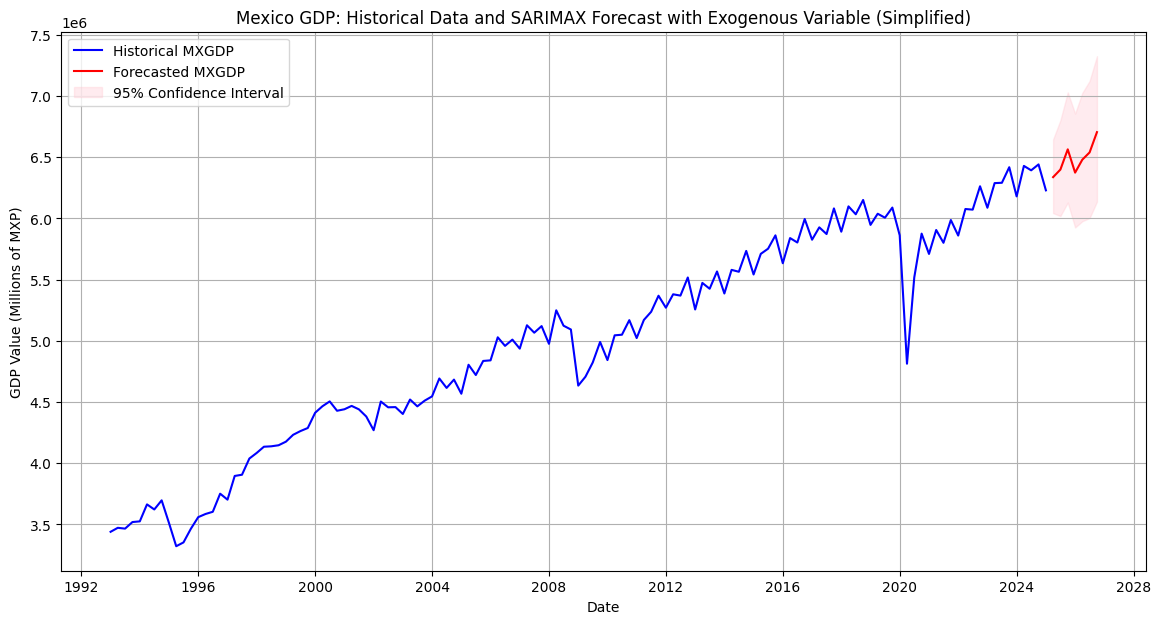

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prepare the log-transformed GDP data (assuming merged_df is available)
dependent_variable = merged_df['logMXGDP']
exogenous_variable = merged_df['annual_growth_USGDP']

# Determine the number of forecast steps
forecast_steps_gdp = 7 # Remaining quarters of 2025 (3) + all quarters of 2026 (4)

# Prepare the forecast for the exogenous variable (assuming last observed value for simplicity)
last_observed_date = merged_df.index[-1]
start_forecast_date = last_observed_date + pd.DateOffset(months=3) # Next quarter
end_forecast_date = '2026-10-01' # End of 2026 for quarterly data
forecast_dates = pd.date_range(start=start_forecast_date, end=end_forecast_date, freq='QS-OCT')
last_annual_growth_usgdp = merged_df['annual_growth_USGDP'].iloc[-1]
forecast_exog = pd.Series(last_annual_growth_usgdp, index=forecast_dates, name='annual_growth_USGDP')

# Fit the SARIMAX model with the determined orders and exogenous variable
model_exog = SARIMAX(dependent_variable,
                     exog=exogenous_variable,
                     order=(1, 0, 0),
                     seasonal_order=(0, 1, 1, 4),
                     trend='c') # Include constant/drift term
result_exog = model_exog.fit(maxiter=1000)

print("SARIMAX Model Summary with Exogenous Variable:")
print(result_exog.summary())

# Generate the forecast for Mexico GDP with the forecasted exogenous variable
forecast_result_mx_gdp = result_exog.get_forecast(steps=len(forecast_exog), exog=forecast_exog)

# Get the mean forecast (log-transformed) and confidence intervals
forecast_log_mx_gdp = forecast_result_mx_gdp.predicted_mean
forecast_ci_mx_gdp = forecast_result_mx_gdp.conf_int(alpha=0.05)

# Convert log forecast values back to original scale of GDP
forecast_values_mx_gdp = np.exp(forecast_log_mx_gdp)
forecast_ci_mx_gdp_original_scale = np.exp(forecast_ci_mx_gdp)

# Plot historical and forecast values
plt.figure(figsize=(14, 7))
plt.plot(mxgdpdf.index, mxgdpdf['MXGDP'], label='Historical MXGDP', color='blue')
plt.plot(forecast_values_mx_gdp.index, forecast_values_mx_gdp, label='Forecasted MXGDP', color='red')
plt.fill_between(forecast_values_mx_gdp.index,
                 forecast_ci_mx_gdp_original_scale.iloc[:, 0],
                 forecast_ci_mx_gdp_original_scale.iloc[:, 1],
                 color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('Mexico GDP: Historical Data and SARIMAX Forecast with Exogenous Variable (Simplified)')
plt.xlabel('Date')
plt.ylabel('GDP Value (Millions of MXP)')
plt.legend()
plt.grid(True)
plt.show()

# Challenge 2



  Calibrate an ARIMA-SARIMA to forecast the US GDP for the the rest of 2025 and all quarters of 2026.

  Using your previous Mexico SARIMA model, use the US GDP annual % growth as an explanatory variable (exogenous variable).

  Interpret the final model.


In [ ]:
import pandas_datareader as pdr
import numpy as np

# 2. Download the 'GDPC1' series from FRED
us_gdp_challenge_df = pdr.get_data_fred('GDPC1', start='1993-01-01')

# 3. Rename the column
us_gdp_challenge_df.columns = ['USGDP']

# 4. Create a new column for log-transformed USGDP
us_gdp_challenge_df['logUSGDP_challenge'] = np.log(us_gdp_challenge_df['USGDP'])

print(us_gdp_challenge_df.head())

                USGDP  logUSGDP_challenge
DATE                                     
1993-01-01  10576.275            9.266369
1993-04-01  10637.847            9.272173
1993-07-01  10688.606            9.276934
1993-10-01  10833.987            9.290443
1994-01-01  10939.116            9.300100


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 5. Calculate the annual growth rate for logUSGDP_challenge
us_gdp_challenge_df['annual_growth_USGDP_challenge'] = us_gdp_challenge_df['logUSGDP_challenge'].diff(4)

# Prepare the log-transformed US GDP data, dropping NaNs for model fitting
us_gdp_log_challenge = us_gdp_challenge_df['logUSGDP_challenge'].dropna()

# 7. Define the SARIMA model orders
# Non-seasonal order (p, d, q) = (1, 0, 0)
# Seasonal order (P, D, Q, s) = (0, 1, 1, 4) for quarterly data

# 8. Fit a SARIMA model to the logUSGDP_challenge series
model_us_gdp = SARIMAX(us_gdp_log_challenge, order=(1, 0, 0),
                seasonal_order=(0, 1, 1, 4),
                trend='c') # Include constant/drift term

result_us_gdp = model_us_gdp.fit(maxiter=1000)

print("US GDP SARIMA Model Summary:")
print(result_us_gdp.summary())

print("First 5 rows of us_gdp_challenge_df with annual growth:")
print(us_gdp_challenge_df.head())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


US GDP SARIMA Model Summary:
                                      SARIMAX Results                                      
Dep. Variable:                  logUSGDP_challenge   No. Observations:                  130
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 4)   Log Likelihood                 379.338
Date:                             Thu, 13 Nov 2025   AIC                           -750.675
Time:                                     01:33:44   BIC                           -739.330
Sample:                                 01-01-1993   HQIC                          -746.066
                                      - 04-01-2025                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0009      0.001      1.592      0.111      -0.000       0.00

In [ ]:
import pandas as pd

# 9. Determine the number of forecast steps:
# The last data point in `us_gdp_log_challenge` is '2025-04-01' (Q1 2025). The prompt asks for Q2, Q3, Q4 of 2025 and all four quarters of 2026.
# Remaining quarters of 2025: Q2, Q3, Q4 (3 quarters)
# All quarters of 2026: Q1, Q2, Q3, Q4 (4 quarters)
# Total forecast steps = 3 + 4 = 7 quarters.
forecast_steps_us_gdp = 7

# 10. Generate the forecast for logUSGDP_challenge
forecast_result_us_gdp = result_us_gdp.get_forecast(steps=forecast_steps_us_gdp)

# 11. Extract the predicted mean of the log-transformed forecast
forecast_log_us_gdp = forecast_result_us_gdp.predicted_mean

# 12. To get the forecasted annual growth (`forecast_exog_us_gdp`):
# Append the predicted mean of the log-transformed forecast to the historical logUSGDP_challenge series
combined_log_us_gdp = pd.concat([us_gdp_log_challenge, forecast_log_us_gdp])

# Calculate the 4-period difference on this combined series
full_annual_growth_us_gdp = combined_log_us_gdp.diff(4)

# Select only the forecasted annual growth values corresponding to the forecast periods for Mexico GDP
# The Mexico GDP forecast is for Q2 2025 to Q4 2026. This aligns with forecast_log_us_gdp's index.
forecast_exog_us_gdp = full_annual_growth_us_gdp[forecast_log_us_gdp.index]

print("Forecasted annual growth of US GDP (exogenous variable):")
print(forecast_exog_us_gdp)

Forecasted annual growth of US GDP (exogenous variable):
2025-07-01    0.023704
2025-10-01    0.026429
2026-01-01    0.031628
2026-04-01    0.025042
2026-07-01    0.025024
2026-10-01    0.025007
2027-01-01    0.024991
dtype: float64


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. Merge the logMXGDP column from the mxgdpdf DataFrame and the annual_growth_USGDP_challenge column from the us_gdp_challenge_df DataFrame
# Ensure both series are aligned by their date index
merged_df_challenge = pd.merge(mxgdpdf['logMXGDP'], us_gdp_challenge_df['annual_growth_USGDP_challenge'],
                               left_index=True, right_index=True, how='inner')

# 2. From merged_df_challenge, define logMXGDP as the dependent variable and annual_growth_USGDP_challenge as the exogenous variable
# Drop any NaN values that might result from the merge or initial differencing for annual_growth_USGDP_challenge
merged_df_challenge = merged_df_challenge.dropna()
dependent_variable_challenge = merged_df_challenge['logMXGDP']
exogenous_variable_challenge = merged_df_challenge['annual_growth_USGDP_challenge']

# 3. Instantiate a SARIMAX model
model_exog_mx_challenge = SARIMAX(dependent_variable_challenge,
                                    exog=exogenous_variable_challenge,
                                    order=(1, 0, 0),
                                    seasonal_order=(0, 1, 1, 4),
                                    trend='c') # Include constant/drift term

# 4. Fit the SARIMAX model
result_exog_mx = model_exog_mx_challenge.fit(maxiter=1000)

print("SARIMAX Model Summary for Mexico GDP with US GDP annual growth as exogenous variable:")
print(result_exog_mx.summary())
print("First few rows of merged_df_challenge:")
print(merged_df_challenge.head())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


SARIMAX Model Summary for Mexico GDP with US GDP annual growth as exogenous variable:
                                      SARIMAX Results                                      
Dep. Variable:                            logMXGDP   No. Observations:                  125
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 4)   Log Likelihood                 276.927
Date:                             Thu, 13 Nov 2025   AIC                           -543.855
Time:                                     01:34:18   BIC                           -529.876
Sample:                                 01-01-1994   HQIC                          -538.177
                                      - 01-01-2025                                         
Covariance Type:                               opg                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------

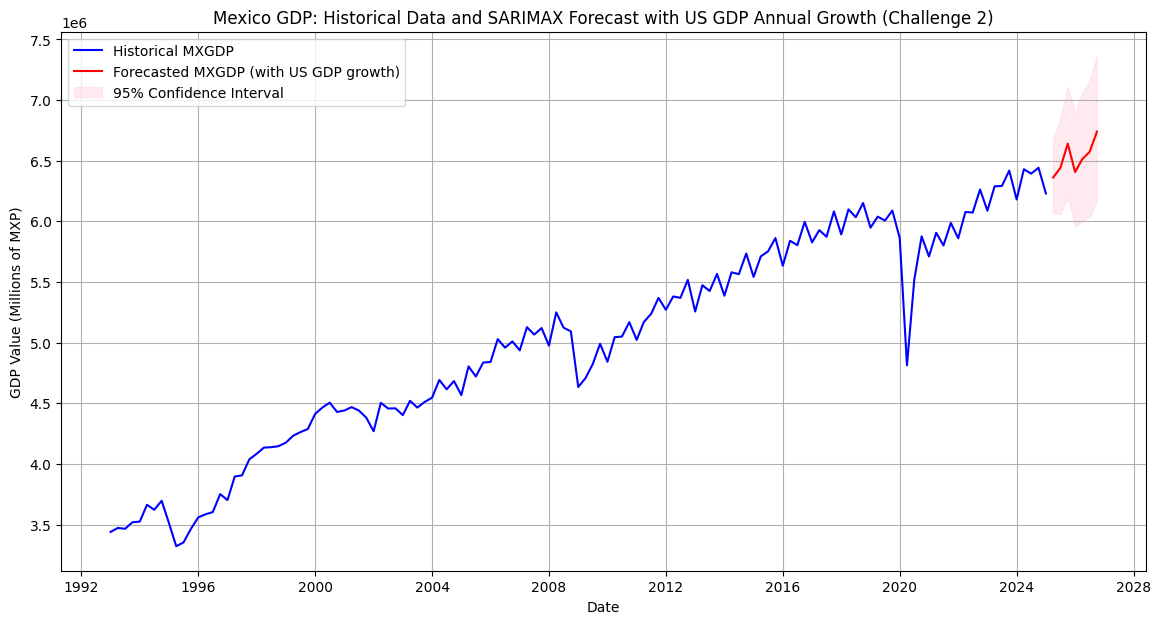

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 5. Determine the number of forecast steps for Mexico GDP
# This should be the same as the forecast steps for the exogenous US GDP variable
forecast_steps_mx_gdp = len(forecast_exog_us_gdp)

# 6. Generate the forecast for Mexico GDP with the forecasted exogenous variable
forecast_result_mx_gdp_challenge = result_exog_mx.get_forecast(steps=forecast_steps_mx_gdp, exog=forecast_exog_us_gdp)

# 7. Get the mean forecast (log-transformed) and confidence intervals
forecast_log_mx_gdp_challenge = forecast_result_mx_gdp_challenge.predicted_mean
forecast_ci_mx_gdp_challenge = forecast_result_mx_gdp_challenge.conf_int(alpha=0.05)

# 8. Convert log forecast values back to original scale of GDP
forecast_values_mx_gdp_challenge = np.exp(forecast_log_mx_gdp_challenge)
forecast_ci_mx_gdp_original_scale_challenge = np.exp(forecast_ci_mx_gdp_challenge)

# 9. Plot historical and forecast values
plt.figure(figsize=(14, 7))
plt.plot(mxgdpdf.index, mxgdpdf['MXGDP'], label='Historical MXGDP', color='blue')
plt.plot(forecast_values_mx_gdp_challenge.index, forecast_values_mx_gdp_challenge, label='Forecasted MXGDP (with US GDP growth)', color='red')
plt.fill_between(forecast_values_mx_gdp_challenge.index,
                 forecast_ci_mx_gdp_original_scale_challenge.iloc[:, 0],
                 forecast_ci_mx_gdp_original_scale_challenge.iloc[:, 1],
                 color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('Mexico GDP: Historical Data and SARIMAX Forecast with US GDP Annual Growth (Challenge 2)')
plt.xlabel('Date')
plt.ylabel('GDP Value (Millions of MXP)')
plt.legend()
plt.grid(True)
plt.show()

 ## Variables:
 Intercept (0.0037): represents the constant term in the model, indicating a baseline growth rate in log Mexico GDP when other factors are zero.

annual_growth_USGDP_challenge (0.9880): This is a highly significant coefficient (p-value is almost 0) indicating a strong positive relationship. It suggests that a 1-unit increase in the annual growth of US GDP is associated with an approximately 0.9880-unit increase in the log of Mexico's GDP, demonstrating that Mexico's economy tends to follow US economic trends.


ar.L1 (0.8074): It´s the non-seasonal autoregressive coefficient at lag 1, also highly significant. It means that the log of Mexicos GDP in the current quarter is strongly influenced by its value in the previous quarter.


ma.S.L4 (-0.6953): This is the seasonal moving average coefficient at lag 4, which is significant. It captures the impact of seasonal shocks from four quarters ago on the current pattern of Mexico GDP.


sigma2 (0.0006): This represents the variance of the model residuals, which is an estimate of the error variance. Its small value suggests a good fit of the model to the data.


 # Imterpretation:
 The model includes both autoregressive and seasonal patterns for Mexico's GDP and shows a strong and positive connection with the US GDP annual growth. This means that when the US economy grows, Mexico GDP tends to follow. The model successfully captures most of the predictable movements in Mexico's GDP, as indicated by the Jung box test, meaning its errors are mostly random noise. This is specially obvious during the pandemic, where a big dip in the US economy reflected on an enormous dip in Mexico´s economy

However, its important to note that while the model effectively explains GDP trends, its errors aren't perfectly normally distributed and show varying levels of volatility over time. This suggests that while the forecasts for the average GDP are reliable, the exact precision of the prediction intervals (the range of possible future GDP values) might be affected.